In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot, graphviz
import os

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

C:\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
telecom_data = pd.read_csv('./telecom_churn_data.csv')
telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
telecom_data.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8','sep_vbc_3g':'vbc_3g_9'},inplace=True)

In [4]:
telecom_data['total_rech_data_6'] = telecom_data['total_rech_data_6'].fillna(0)
telecom_data['total_rech_data_7'] = telecom_data['total_rech_data_7'].fillna(0)
telecom_data['total_rech_data_8'] = telecom_data['total_rech_data_8'].fillna(0)
telecom_data['total_rech_data_9'] = telecom_data['total_rech_data_9'].fillna(0)

telecom_data['av_rech_amt_data_6'] = telecom_data['av_rech_amt_data_6'].fillna(0)
telecom_data['av_rech_amt_data_7'] = telecom_data['av_rech_amt_data_7'].fillna(0)
telecom_data['av_rech_amt_data_8'] = telecom_data['av_rech_amt_data_8'].fillna(0)
telecom_data['av_rech_amt_data_9'] = telecom_data['av_rech_amt_data_9'].fillna(0)

telecom_data['max_rech_data_6'] = telecom_data['max_rech_data_6'].fillna(0)
telecom_data['max_rech_data_7'] = telecom_data['max_rech_data_7'].fillna(0)
telecom_data['max_rech_data_8'] = telecom_data['max_rech_data_8'].fillna(0)
telecom_data['max_rech_data_9'] = telecom_data['max_rech_data_9'].fillna(0)

telecom_data['night_pck_user_6'] = telecom_data['night_pck_user_6'].fillna(-1)
telecom_data['night_pck_user_7'] = telecom_data['night_pck_user_7'].fillna(-1)
telecom_data['night_pck_user_8'] = telecom_data['night_pck_user_8'].fillna(-1)
telecom_data['night_pck_user_9'] = telecom_data['night_pck_user_9'].fillna(-1)

telecom_data['fb_user_6'] = telecom_data['fb_user_6'].fillna(-1)
telecom_data['fb_user_7'] = telecom_data['fb_user_7'].fillna(-1)
telecom_data['fb_user_8'] = telecom_data['fb_user_8'].fillna(-1)
telecom_data['fb_user_9'] = telecom_data['fb_user_9'].fillna(-1)

In [5]:
#for cols in telecom_data.select_dtypes(include=['object']).columns :
#    telecom_data[cols] = pd.to_datetime(telecom_data[cols],infer_datetime_format=True).dt.date

In [6]:
telecom_data['tot_rech_amt_data_6'] = (telecom_data["av_rech_amt_data_6"] * telecom_data["total_rech_data_6"])
telecom_data['tot_rech_amt_data_7'] = (telecom_data["av_rech_amt_data_7"] * telecom_data["total_rech_data_7"])

In [7]:
telecom_data['total_rech_6_7_avg'] = (telecom_data['tot_rech_amt_data_6'] + telecom_data['total_rech_amt_6'] + 
                                      telecom_data['tot_rech_amt_data_7'] + telecom_data['total_rech_amt_7'])/2

In [8]:
telecom_data['total_rech_6_7_avg'].quantile(0.7)

478.0

In [9]:
telecom_data_analysis = telecom_data.loc[(telecom_data['total_rech_6_7_avg'] >= 478.0),:]

In [10]:
telecom_data_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 229 entries, mobile_number to total_rech_6_7_avg
dtypes: float64(182), int64(35), object(12)
memory usage: 52.6+ MB


In [11]:
telecom_data_analysis['churn'] = 0

telecom_data_analysis['tot_ic_og_9'] = telecom_data_analysis['total_ic_mou_9'] + telecom_data_analysis['total_og_mou_9']
telecom_data_analysis['tot_data_9'] = telecom_data_analysis['vol_2g_mb_9'] + telecom_data_analysis['vol_3g_mb_9']

telecom_data_analysis.loc[(telecom_data_analysis['tot_ic_og_9'] == 0.0) & (telecom_data_analysis['tot_data_9'] == 0.0),'churn'] = 1


In [12]:
telecom_data_analysis['churn'].value_counts()

0    27560
1     2441
Name: churn, dtype: int64

In [13]:
# Drop the columns with _9
cols_to_be_dropped = []
for cols in telecom_data_analysis.columns:
    if cols.endswith('9'):
        cols_to_be_dropped.append(cols)
        
telecom_data_analysis.drop(cols_to_be_dropped,axis=1,inplace=True)    

In [14]:
telecom_data_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 175 entries, mobile_number to churn
dtypes: float64(138), int64(28), object(9)
memory usage: 40.3+ MB


In [15]:
round(100 * telecom_data_analysis.isnull().sum() / len(telecom_data_analysis.index),2)

mobile_number            0.00
circle_id                0.00
loc_og_t2o_mou           0.75
std_og_t2o_mou           0.75
loc_ic_t2o_mou           0.75
last_date_of_month_6     0.00
last_date_of_month_7     0.09
last_date_of_month_8     0.55
arpu_6                   0.00
arpu_7                   0.00
arpu_8                   0.00
onnet_mou_6              1.82
onnet_mou_7              1.79
onnet_mou_8              3.91
offnet_mou_6             1.82
offnet_mou_7             1.79
offnet_mou_8             3.91
roam_ic_mou_6            1.82
roam_ic_mou_7            1.79
roam_ic_mou_8            3.91
roam_og_mou_6            1.82
roam_og_mou_7            1.79
roam_og_mou_8            3.91
loc_og_t2t_mou_6         1.82
loc_og_t2t_mou_7         1.79
loc_og_t2t_mou_8         3.91
loc_og_t2m_mou_6         1.82
loc_og_t2m_mou_7         1.79
loc_og_t2m_mou_8         3.91
loc_og_t2f_mou_6         1.82
                        ...  
arpu_3g_8               46.83
arpu_2g_6               44.15
arpu_2g_7 

In [16]:
# do one hot encoding - Regression. 
# do label encoding - Tree (not required as values are numeric).
# do different scaling for Dates fields.
# should we drop tot_rech_amt_6_7, total_rech_data_amt_6_7_8 / avg_rech_data_6_7_8
# drop the columns with 1 unique value for DTree but not for PCA & LR
# so essentially you should have different data set for Tree & Regression algo's
telecom_data_analysis.drop(['mobile_number','circle_id'],axis=1,inplace=True)

In [17]:
columns = telecom_data_analysis.columns
col_data_map = {}
for cols in columns:
    val = round(100 * telecom_data_analysis[cols].isnull().sum() / len(telecom_data_analysis.index),2)
    if (val >= 25):        
        col_data_map.update({cols:val})
        
print(col_data_map)    

{'date_of_last_rech_data_6': 44.15, 'date_of_last_rech_data_7': 43.15, 'date_of_last_rech_data_8': 46.83, 'count_rech_2g_6': 44.15, 'count_rech_2g_7': 43.15, 'count_rech_2g_8': 46.83, 'count_rech_3g_6': 44.15, 'count_rech_3g_7': 43.15, 'count_rech_3g_8': 46.83, 'arpu_3g_6': 44.15, 'arpu_3g_7': 43.15, 'arpu_3g_8': 46.83, 'arpu_2g_6': 44.15, 'arpu_2g_7': 43.15, 'arpu_2g_8': 46.83}


In [18]:
columns = telecom_data_analysis.columns
col_unique_map = {}
for cols in columns:
    val = telecom_data_analysis[cols].nunique()
    if (val == 1):        
        col_unique_map.update({cols:val})
        
print(col_unique_map)    

{'loc_og_t2o_mou': 1, 'std_og_t2o_mou': 1, 'loc_ic_t2o_mou': 1, 'last_date_of_month_6': 1, 'last_date_of_month_7': 1, 'last_date_of_month_8': 1, 'std_og_t2c_mou_6': 1, 'std_og_t2c_mou_7': 1, 'std_og_t2c_mou_8': 1, 'std_ic_t2o_mou_6': 1, 'std_ic_t2o_mou_7': 1, 'std_ic_t2o_mou_8': 1}


In [19]:
columns = telecom_data_analysis.columns
col_unique_map = {}
for cols in columns:
    val = telecom_data_analysis[cols].nunique()
    if val in range(2,100,1) :        
        col_unique_map.update({cols:val})
        
print(col_unique_map) 

{'spl_ic_mou_6': 78, 'spl_ic_mou_7': 92, 'spl_ic_mou_8': 80, 'total_rech_num_8': 96, 'date_of_last_rech_6': 30, 'date_of_last_rech_7': 31, 'date_of_last_rech_8': 31, 'date_of_last_rech_data_6': 30, 'date_of_last_rech_data_7': 31, 'date_of_last_rech_data_8': 31, 'total_rech_data_6': 38, 'total_rech_data_7': 43, 'total_rech_data_8': 47, 'max_rech_data_6': 48, 'max_rech_data_7': 49, 'max_rech_data_8': 49, 'count_rech_2g_6': 31, 'count_rech_2g_7': 36, 'count_rech_2g_8': 34, 'count_rech_3g_6': 25, 'count_rech_3g_7': 28, 'count_rech_3g_8': 29, 'night_pck_user_6': 3, 'night_pck_user_7': 3, 'night_pck_user_8': 3, 'monthly_2g_6': 5, 'monthly_2g_7': 6, 'monthly_2g_8': 6, 'sachet_2g_6': 31, 'sachet_2g_7': 35, 'sachet_2g_8': 34, 'monthly_3g_6': 12, 'monthly_3g_7': 15, 'monthly_3g_8': 12, 'sachet_3g_6': 25, 'sachet_3g_7': 27, 'sachet_3g_8': 29, 'fb_user_6': 3, 'fb_user_7': 3, 'fb_user_8': 3, 'churn': 2}


In [20]:
#from datetime import datetime
#telecom_data_analysis['date_of_last_rech_8'].fillna(datetime(2014,8,31).date,inplace=True)
#telecom_data_analysis['date_of_last_rech_7'].fillna(datetime(2014,7,31).date,inplace=True)
#telecom_data_analysis['date_of_last_rech_6'].fillna(datetime(2014,6,30).date,inplace=True)

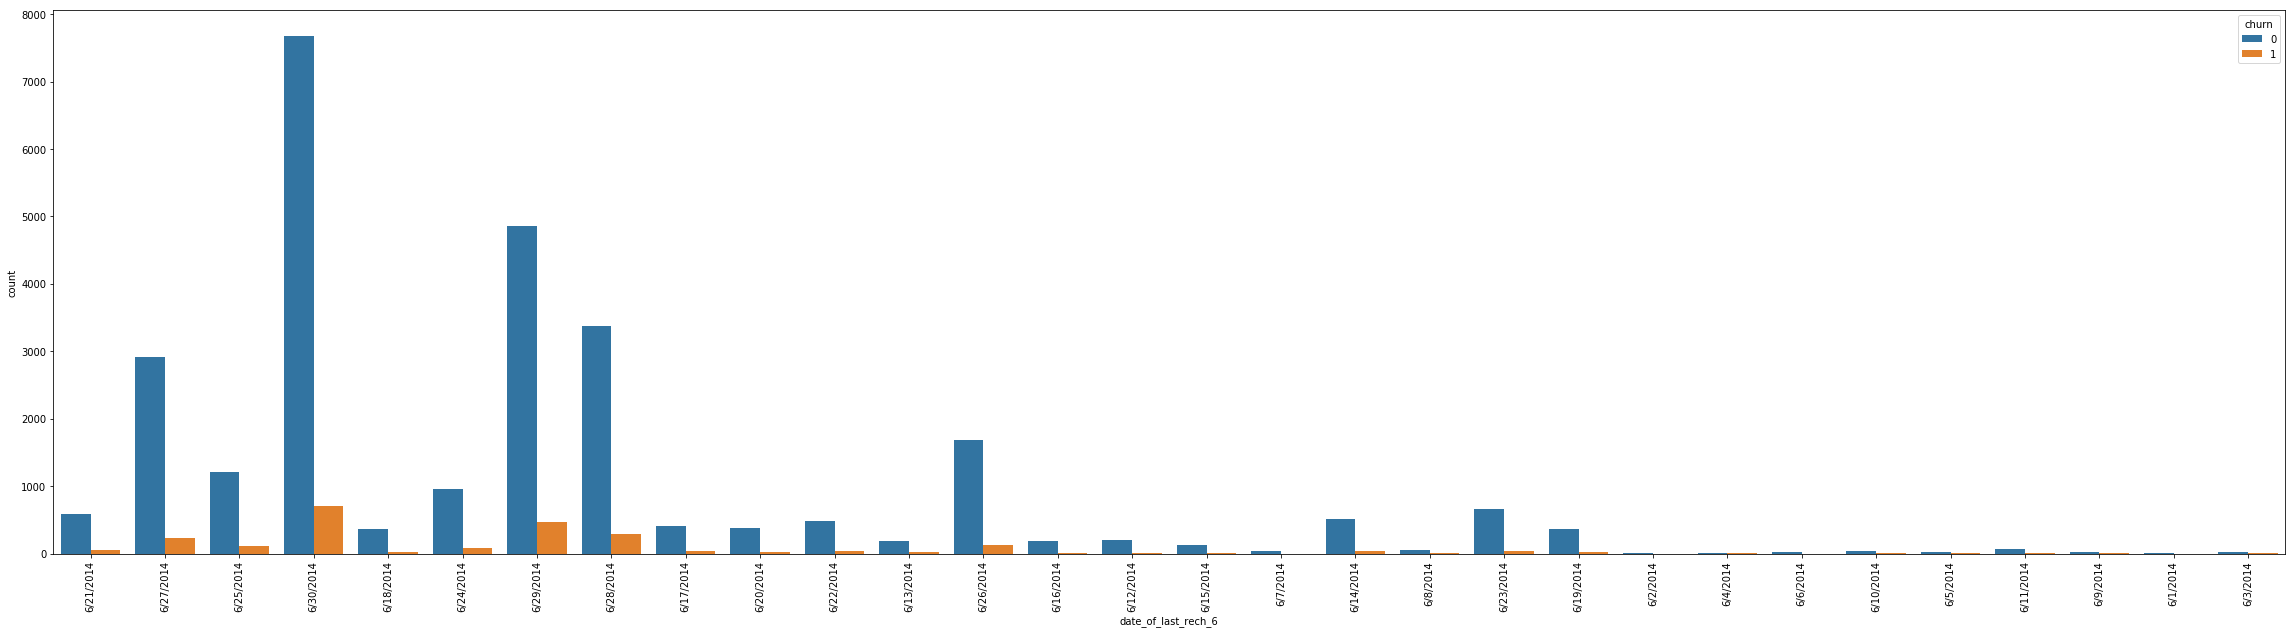

In [21]:
plt.figure(figsize=(40,10))
plt.xticks(rotation=90)
sns.countplot(telecom_data_analysis['date_of_last_rech_6'],hue=telecom_data_analysis['churn'])
plt.show()

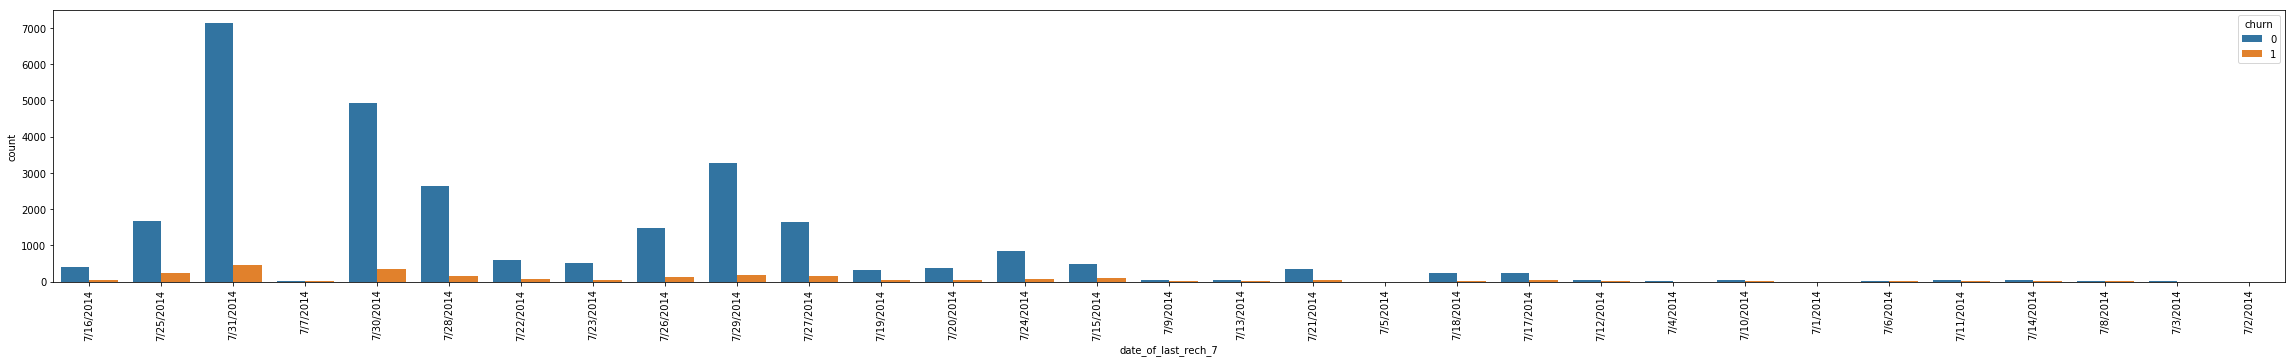

In [22]:
plt.figure(figsize=(40,5))
plt.xticks(rotation=90)
sns.countplot(telecom_data_analysis['date_of_last_rech_7'],hue=telecom_data_analysis['churn'])
plt.show()

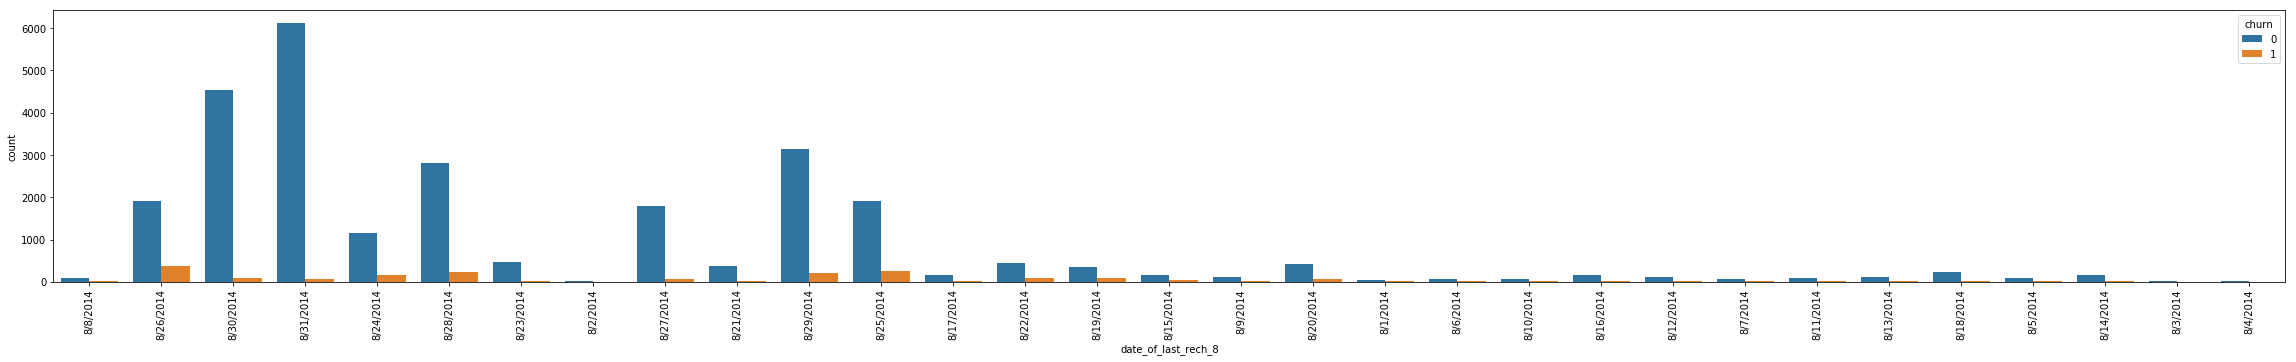

In [23]:
plt.figure(figsize=(40,5))
plt.xticks(rotation=90)
sns.countplot(telecom_data_analysis['date_of_last_rech_8'],hue=telecom_data_analysis['churn'])
plt.show()

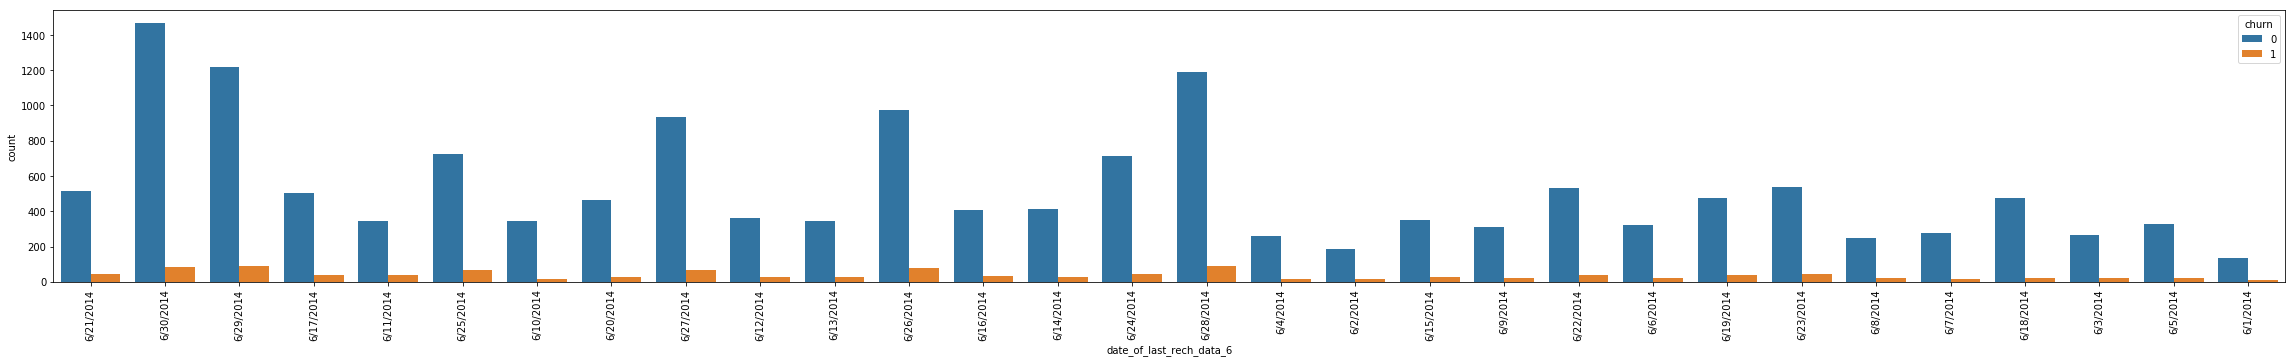

In [24]:
plt.figure(figsize=(40,5))
plt.xticks(rotation=90)
sns.countplot(telecom_data_analysis['date_of_last_rech_data_6'],hue=telecom_data_analysis['churn'])
plt.show()

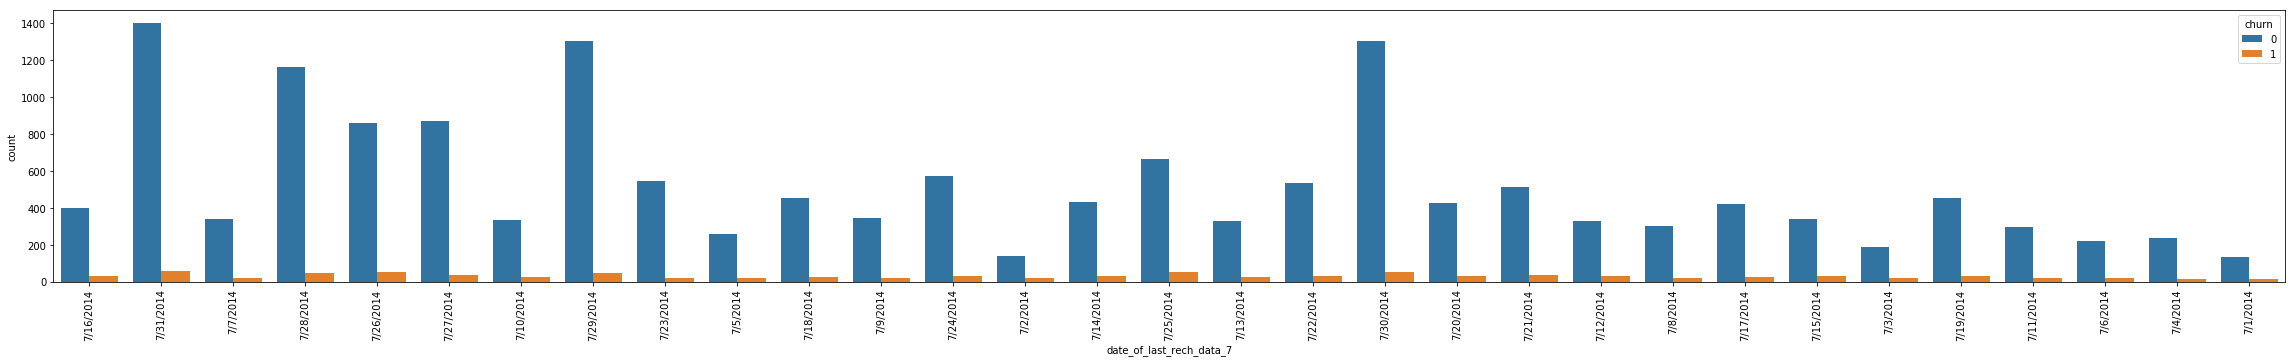

In [25]:
plt.figure(figsize=(40,5))
plt.xticks(rotation=90)
sns.countplot(telecom_data_analysis['date_of_last_rech_data_7'],hue=telecom_data_analysis['churn'])
plt.show()

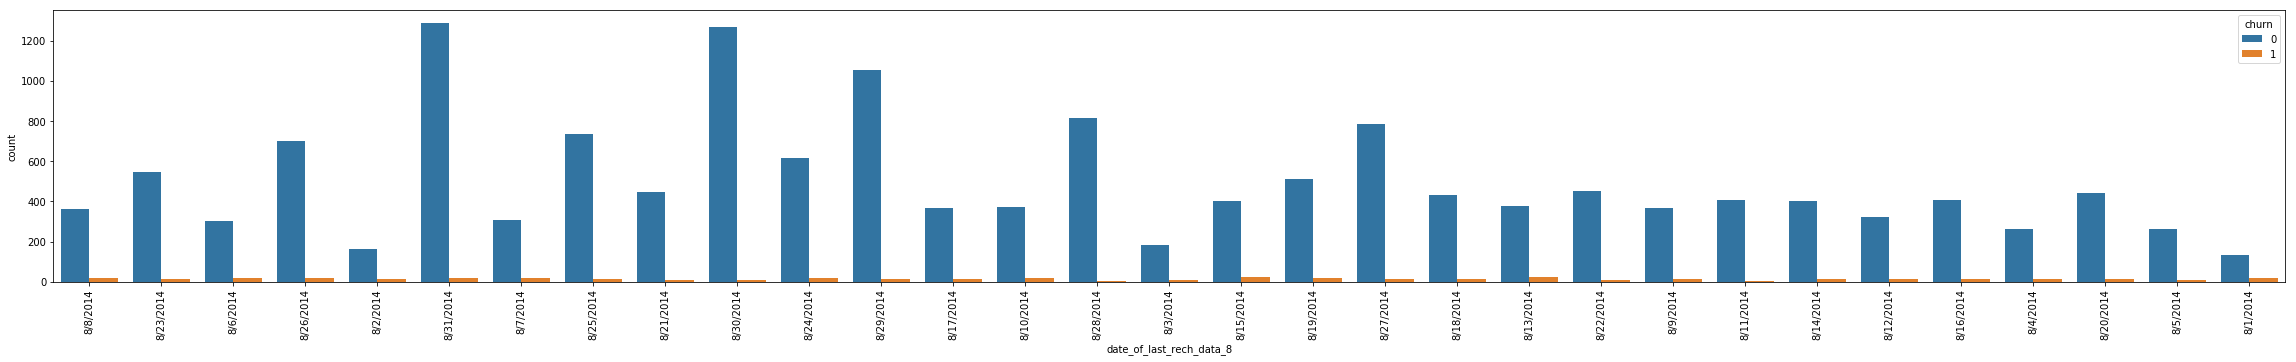

In [26]:
plt.figure(figsize=(40,5))
plt.xticks(rotation=90)
sns.countplot(telecom_data_analysis['date_of_last_rech_data_8'],hue=telecom_data_analysis['churn'])
plt.show()

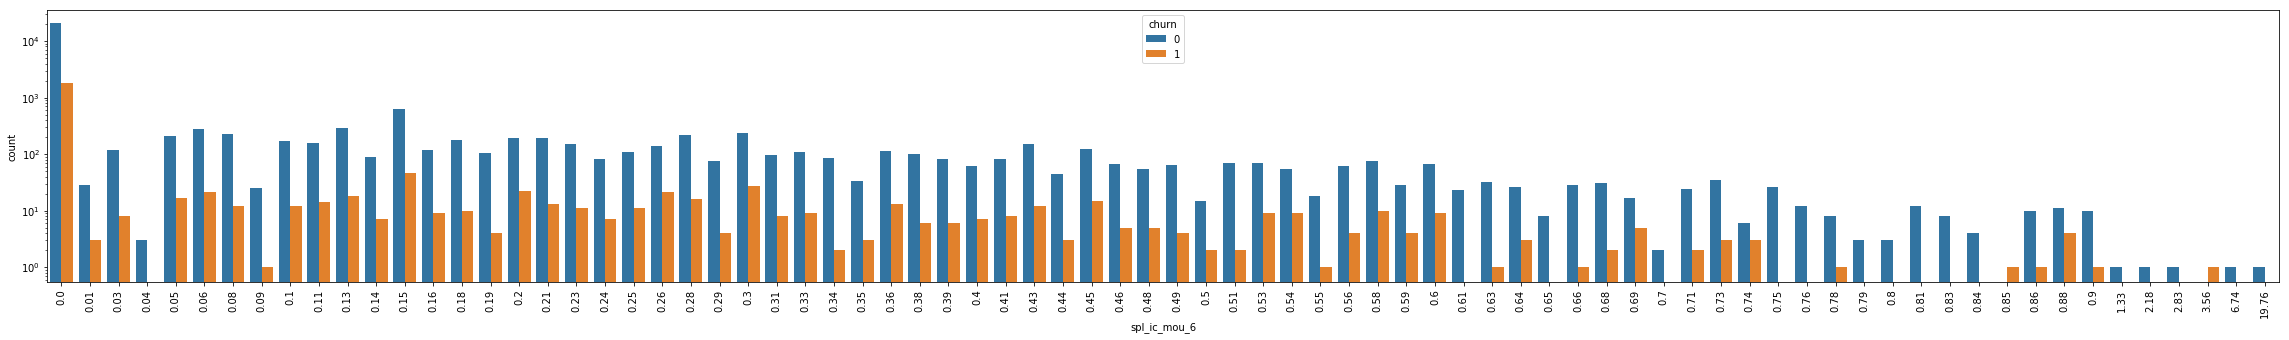

In [27]:
plt.figure(figsize=(40,5))
plt.xticks(rotation=90)
plt.yscale('log')
sns.countplot(telecom_data_analysis['spl_ic_mou_6'],hue=telecom_data_analysis['churn'])
plt.show()

In [28]:
telecom_data_analysis['monthly_2g_6'].value_counts()

0    25394
1     4021
2      551
3       28
4        7
Name: monthly_2g_6, dtype: int64

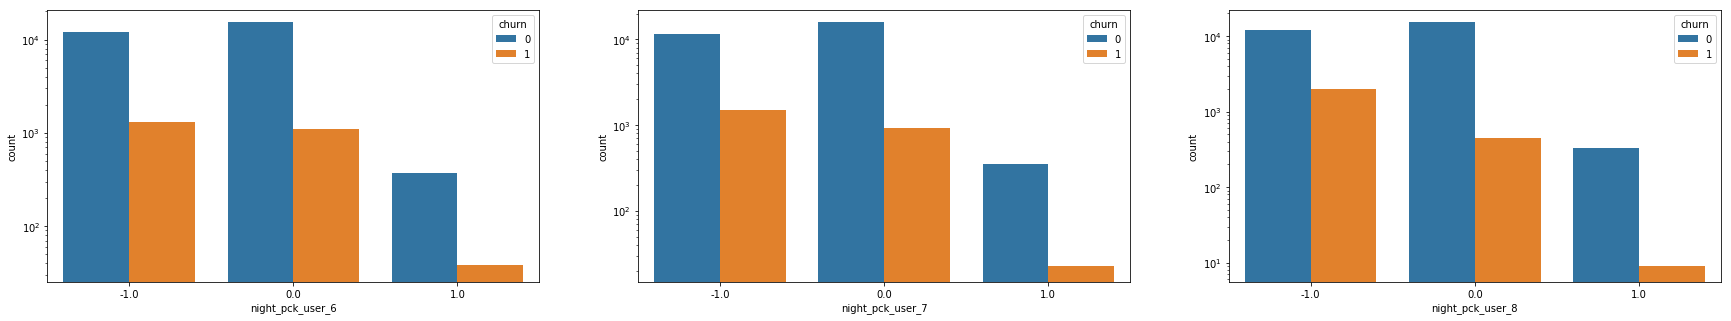

In [29]:
plt.figure(figsize=(30,5))
plt.subplot(1,3,1)
plt.yscale('log')
sns.countplot(telecom_data_analysis['night_pck_user_6'],hue=telecom_data_analysis['churn'])
plt.subplot(1,3,2)
plt.yscale('log')
sns.countplot(telecom_data_analysis['night_pck_user_7'],hue=telecom_data_analysis['churn'])
plt.subplot(1,3,3)
plt.yscale('log')
sns.countplot(telecom_data_analysis['night_pck_user_8'],hue=telecom_data_analysis['churn'])
plt.show()

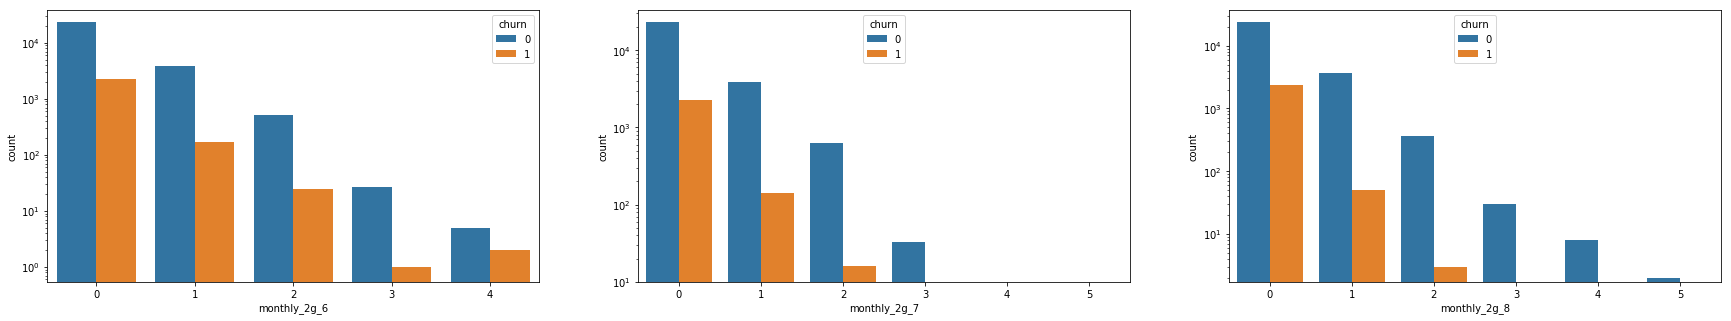

In [30]:
plt.figure(figsize=(30,5))
plt.subplot(1,3,1)
plt.yscale('log')
sns.countplot(telecom_data_analysis['monthly_2g_6'],hue=telecom_data_analysis['churn'])
plt.subplot(1,3,2)
plt.yscale('log')
sns.countplot(telecom_data_analysis['monthly_2g_7'],hue=telecom_data_analysis['churn'])
plt.subplot(1,3,3)
plt.yscale('log')
sns.countplot(telecom_data_analysis['monthly_2g_8'],hue=telecom_data_analysis['churn'])
plt.show()

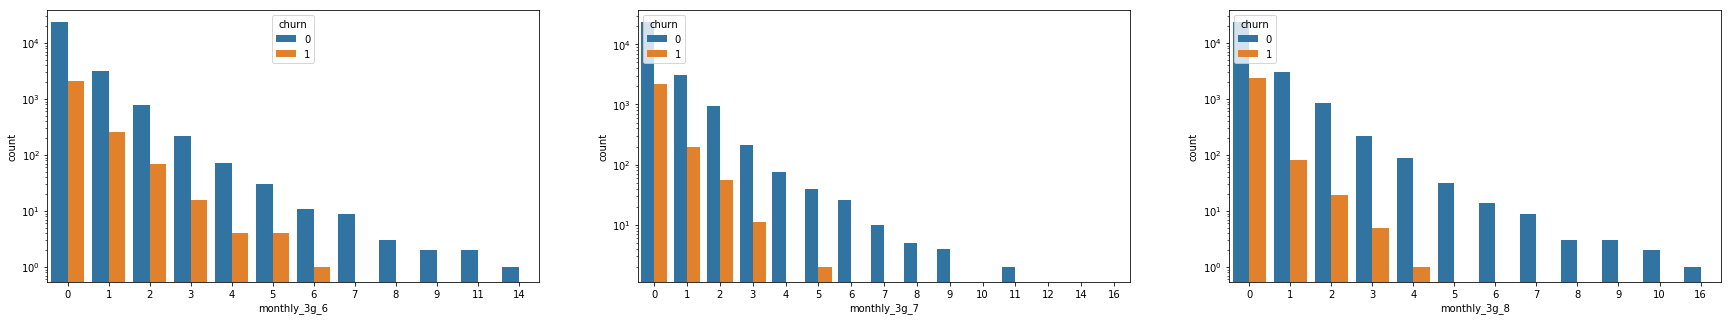

In [31]:
plt.figure(figsize=(30,5))
plt.subplot(1,3,1)
plt.yscale('log')
sns.countplot(telecom_data_analysis['monthly_3g_6'],hue=telecom_data_analysis['churn'])
plt.subplot(1,3,2)
plt.yscale('log')
sns.countplot(telecom_data_analysis['monthly_3g_7'],hue=telecom_data_analysis['churn'])
plt.subplot(1,3,3)
plt.yscale('log')
sns.countplot(telecom_data_analysis['monthly_3g_8'],hue=telecom_data_analysis['churn'])
plt.show()

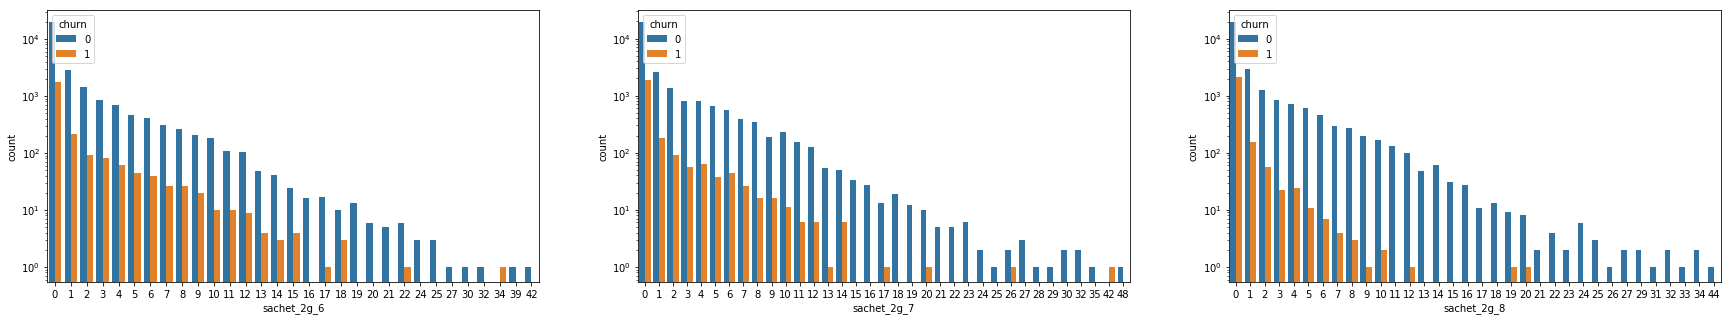

In [32]:
plt.figure(figsize=(30,5))
plt.subplot(1,3,1)
plt.yscale('log')
sns.countplot(telecom_data_analysis['sachet_2g_6'],hue=telecom_data_analysis['churn'])
plt.subplot(1,3,2)
plt.yscale('log')
sns.countplot(telecom_data_analysis['sachet_2g_7'],hue=telecom_data_analysis['churn'])
plt.subplot(1,3,3)
plt.yscale('log')
sns.countplot(telecom_data_analysis['sachet_2g_8'],hue=telecom_data_analysis['churn'])
plt.show()

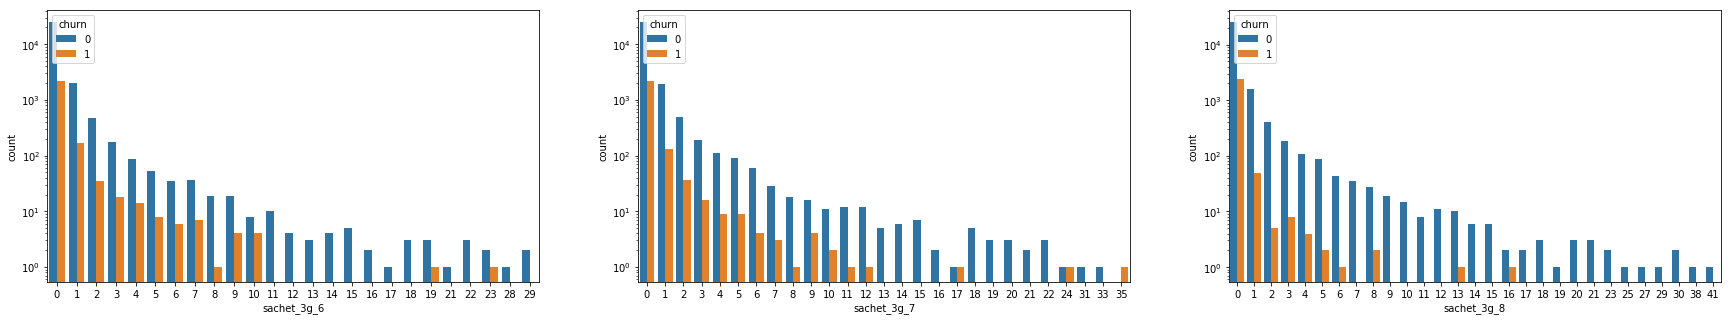

In [33]:
plt.figure(figsize=(30,5))
plt.subplot(1,3,1)
plt.yscale('log')
sns.countplot(telecom_data_analysis['sachet_3g_6'],hue=telecom_data_analysis['churn'])
plt.subplot(1,3,2)
plt.yscale('log')
sns.countplot(telecom_data_analysis['sachet_3g_7'],hue=telecom_data_analysis['churn'])
plt.subplot(1,3,3)
plt.yscale('log')
sns.countplot(telecom_data_analysis['sachet_3g_8'],hue=telecom_data_analysis['churn'])
plt.show()

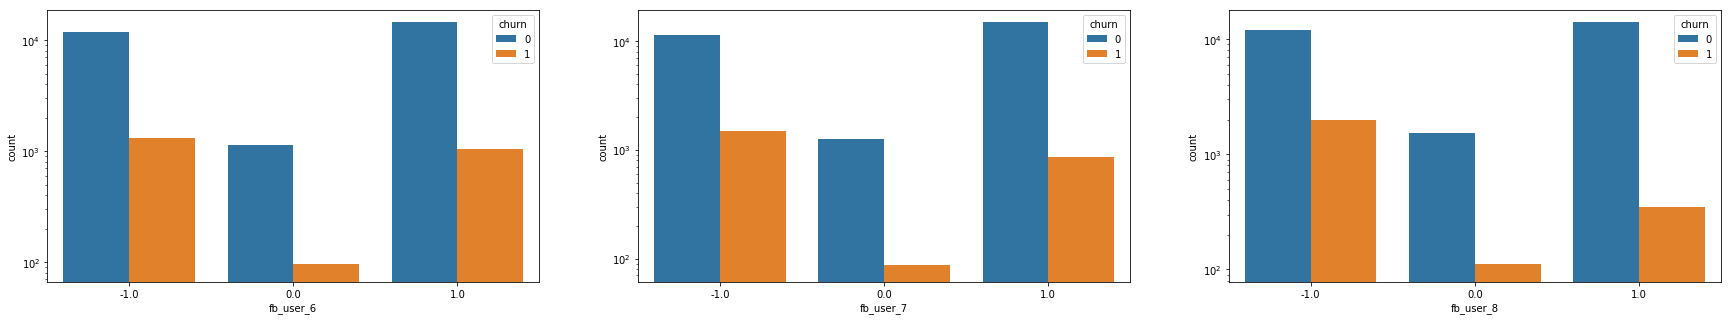

In [34]:
plt.figure(figsize=(30,5))
plt.subplot(1,3,1)
plt.yscale('log')
sns.countplot(telecom_data_analysis['fb_user_6'],hue=telecom_data_analysis['churn'])
plt.subplot(1,3,2)
plt.yscale('log')
sns.countplot(telecom_data_analysis['fb_user_7'],hue=telecom_data_analysis['churn'])
plt.subplot(1,3,3)
plt.yscale('log')
sns.countplot(telecom_data_analysis['fb_user_8'],hue=telecom_data_analysis['churn'])
plt.show()

In [35]:
telecom_data_analysis.fillna(0,inplace=True)

In [36]:
cols_to_drop = ['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','total_rech_data_6','total_rech_data_7'
                ,'total_rech_data_8','total_rech_6_7_avg']
telecom_data_analysis.drop(cols_to_drop, axis=1,inplace=True)

In [37]:
delta_6 = pd.to_datetime(telecom_data_analysis['last_date_of_month_6'],infer_datetime_format=True) - pd.to_datetime(telecom_data_analysis['date_of_last_rech_6'],infer_datetime_format=True) 
delta_7= pd.to_datetime(telecom_data_analysis['last_date_of_month_7'],infer_datetime_format=True) - pd.to_datetime(telecom_data_analysis['date_of_last_rech_7'],infer_datetime_format=True) 
delta_8 = pd.to_datetime(telecom_data_analysis['last_date_of_month_8'],infer_datetime_format=True) - pd.to_datetime(telecom_data_analysis['date_of_last_rech_8'],infer_datetime_format=True) 
delta_data_6 = pd.to_datetime(telecom_data_analysis['last_date_of_month_6'],infer_datetime_format=True) - pd.to_datetime(telecom_data_analysis['date_of_last_rech_data_6'],infer_datetime_format=True) 
delta_data_7 = pd.to_datetime(telecom_data_analysis['last_date_of_month_7'],infer_datetime_format=True) - pd.to_datetime(telecom_data_analysis['date_of_last_rech_data_7'],infer_datetime_format=True) 
delta_data_8 = pd.to_datetime(telecom_data_analysis['last_date_of_month_8'],infer_datetime_format=True) - pd.to_datetime(telecom_data_analysis['date_of_last_rech_data_8'],infer_datetime_format=True) 

telecom_data_analysis['delta_6'] = delta_6.astype('str').str.split(' ').str[0].astype('int')
telecom_data_analysis['delta_7'] = delta_7.astype('str').str.split(' ').str[0].astype('int')
telecom_data_analysis['delta_8'] = delta_8.astype('str').str.split(' ').str[0].astype('int')
telecom_data_analysis['delta_data_6'] = delta_data_6.astype('str').str.split(' ').str[0].astype('int')
telecom_data_analysis['delta_data_7'] = delta_data_7.astype('str').str.split(' ').str[0].astype('int')
telecom_data_analysis['delta_data_8'] = delta_data_8.astype('str').str.split(' ').str[0].astype('int')

In [38]:
telecom_data_analysis_lr = telecom_data_analysis.drop(['night_pck_user_6','night_pck_user_7','night_pck_user_8',
                                            'fb_user_6','fb_user_7','fb_user_8'],axis=1)

n_6 = pd.get_dummies(telecom_data_analysis['night_pck_user_6'],prefix='night_pck_user_6',prefix_sep='_',drop_first=True)
n_7 = pd.get_dummies(telecom_data_analysis['night_pck_user_7'],prefix='night_pck_user_7',prefix_sep='_',drop_first=True)
n_8 = pd.get_dummies(telecom_data_analysis['night_pck_user_8'],prefix='night_pck_user_8',prefix_sep='_',drop_first=True)

fb_6 = pd.get_dummies(telecom_data_analysis['fb_user_6'],prefix='fb_user_6',prefix_sep='_',drop_first=True)
fb_7 = pd.get_dummies(telecom_data_analysis['fb_user_7'],prefix='fb_user_7',prefix_sep='_',drop_first=True)
fb_8 = pd.get_dummies(telecom_data_analysis['fb_user_8'],prefix='fb_user_8',prefix_sep='_',drop_first=True)

telecom_data_analysis_lr = pd.concat([telecom_data_analysis_lr,n_6,n_7,n_8,fb_6,fb_7,fb_8 ],axis=1)

In [39]:
col_scale = list(telecom_data_analysis_lr.drop(['churn'],axis=1).select_dtypes(include=['int64','float64','int32']))
X_reg = telecom_data_analysis.loc[:,col_scale]
y_reg = telecom_data_analysis.loc[:,'churn']

In [40]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg,y_reg,train_size=0.7,test_size=0.3,random_state=100)

In [41]:
pca = PCA(n_components=20)
scaler = StandardScaler()

X_train_reg = scaler.fit_transform(X_train_reg)
X_test_reg = scaler.transform(X_test_reg)

In [42]:
x_pca = pca.fit_transform(X_train_reg)
lr = LogisticRegression(class_weight='balanced')
lr.fit(x_pca,y_train_reg)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [43]:
x_test_pca = pca.transform(X_test_reg)
y_pred = lr.predict(x_test_pca)

In [44]:
metrics.confusion_matrix(y_test_reg,y_pred)

array([[6476, 1775],
       [ 169,  581]], dtype=int64)

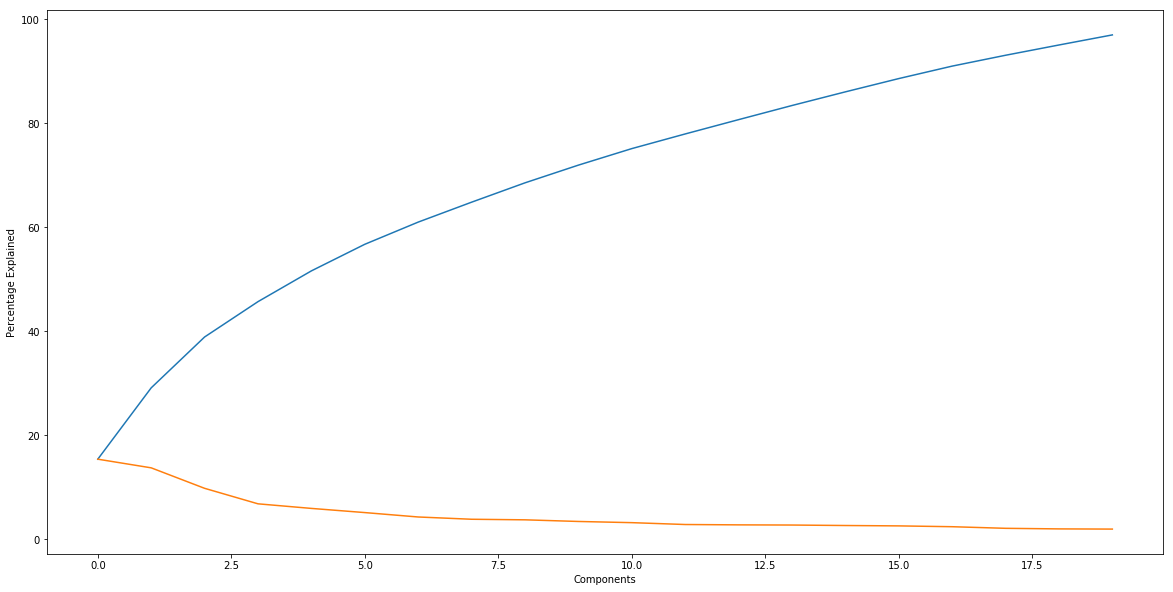

In [45]:
plt.figure(figsize=(20,10))
plt.xlabel('Components')
plt.ylabel('Percentage Explained')
plt.plot(np.cumsum(pca.explained_variance_))
plt.plot(pca.explained_variance_)
plt.show()

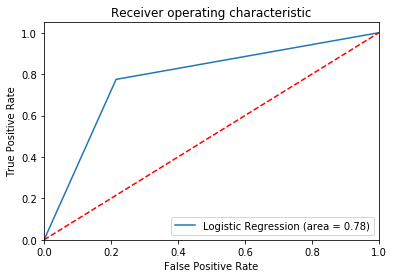

In [46]:
# ROC curve - Logistics
logit_roc_auc = metrics.roc_auc_score(y_test_reg, y_pred)
#fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = metrics.roc_curve(y_test_reg, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [47]:
# select the columns you require for XGBoost & RFC
cols_to_be_dropped = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7',
                      'std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']
telecom_data_analysis_dt = telecom_data_analysis.drop(cols,axis=1)
col_scale = list(telecom_data_analysis.drop(['churn'],axis=1).select_dtypes(include=['int64','float64','int32']))
X = telecom_data_analysis_dt.loc[:,col_scale]
y = telecom_data_analysis.loc[:,'churn']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [48]:
xgb = XGBClassifier(class_weight='balanced')
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
metrics.confusion_matrix(y_test,y_pred_xgb)

array([[8106,  145],
       [ 358,  392]], dtype=int64)

In [49]:
metrics.accuracy_score(y_test,y_pred_xgb)

0.9441173202977446

In [50]:
metrics.recall_score(y_test,y_pred_xgb)

0.5226666666666666

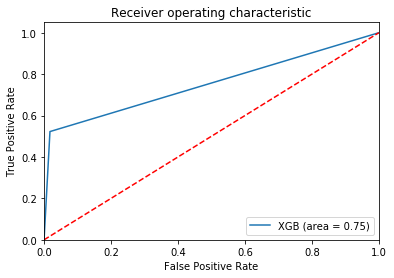

In [51]:
# ROC - XGB
logit_roc_auc = metrics.roc_auc_score(y_test, y_pred_xgb)
#fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_xgb)
plt.figure()
plt.plot(fpr, tpr, label='XGB (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [52]:
rfc = RandomForestClassifier(class_weight='balanced')
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)
metrics.confusion_matrix(y_test,y_pred_rfc)

array([[8154,   97],
       [ 438,  312]], dtype=int64)

In [53]:
metrics.accuracy_score(y_test,y_pred_rfc)

0.9405621597600267

In [54]:
metrics.recall_score(y_test,y_pred_rfc)

0.416

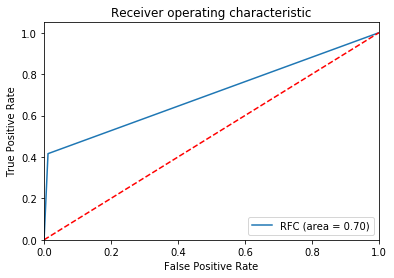

In [55]:
# ROC - XGB
logit_roc_auc = metrics.roc_auc_score(y_test, y_pred_rfc)
#fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_rfc)
plt.figure()
plt.plot(fpr, tpr, label='RFC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [56]:
logRegression = LogisticRegression(class_weight='balanced')
rfe = RFE(logRegression,20)
rfe.fit(X_train_reg,y_train_reg)

RFE(estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
  n_features_to_select=20, step=1, verbose=0)

In [57]:
print(rfe.ranking_)
print(rfe.estimator_)
print(rfe.n_features_)
print(rfe.support_)

[137 136 135   2  12   6  33  75   1 112   1   1  51 109 123 111   1  21
  63  91  37  34  19  17  92  95 119  49  80  48 110  65   1  77  18  20
  31   1  54 113  78  38 130 131 134  62   1  53  79  66  50 105  64  47
  35  68  67  32   1  97  84 106  15  93   1  14  73  81  16  90   1   1
  85   1   1 125  72  59 104  55  44 133 132 129  94  88  58   9 107   1
  39  40  24  86 108  52  45  56  46  99  36   1  96  13   5  89  30   8
  98 120   1  60 115   7 114 121   1  69 126  26 103  10   1 128  43  42
  41 100  71  23 118  25 117  11   1  27 122   3 127 101   1  29  82  57
   4  22  87 124  28 102  70  83  76  61 116  74]
LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
20
[False False False False False False False False  True False  True  True
 False False False 

In [58]:
telecom_data_analysis_rfe = X_reg.loc[:,rfe.support_]

In [59]:
telecom_data_analysis_rfe.columns

Index(['onnet_mou_8', 'offnet_mou_7', 'offnet_mou_8', 'roam_og_mou_7',
       'loc_og_mou_8', 'std_og_t2m_mou_7', 'std_og_mou_7', 'total_og_mou_7',
       'loc_ic_t2m_mou_7', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_7',
       'std_ic_t2t_mou_8', 'total_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'count_rech_2g_8', 'vol_2g_mb_8', 'monthly_2g_8',
       'monthly_3g_8'],
      dtype='object')

In [60]:
lr_after_rfe = LogisticRegression(class_weight='balanced')
std1 = StandardScaler()
X_reg_rfe = X_reg.loc[:,rfe.support_]
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg_rfe,y_reg,train_size=0.7,test_size=0.3,random_state=100)
X_train_reg = std1.fit_transform(X_train_reg)
X_test_reg = std1.transform(X_test_reg)
lr_after_rfe.fit(X_train_reg,y_train_reg)
y_pred_rfe_lr = lr_after_rfe.predict(X_test_reg)

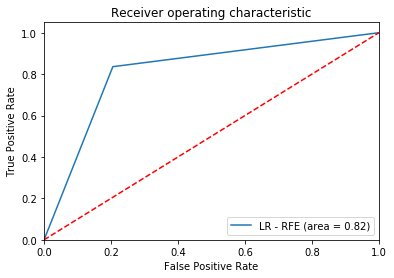

In [61]:
# ROC - LR - RFE
logit_roc_auc = metrics.roc_auc_score(y_test_reg, y_pred_rfe_lr)
#fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = metrics.roc_curve(y_test_reg, y_pred_rfe_lr)
plt.figure()
plt.plot(fpr, tpr, label='LR - RFE (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

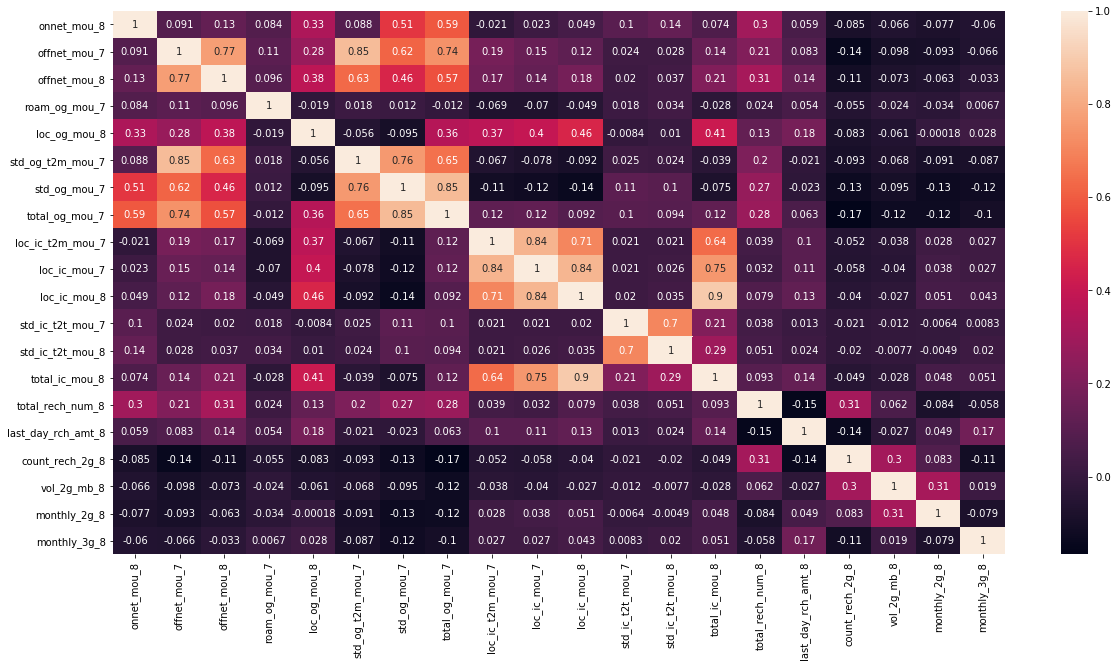

In [62]:
corr = telecom_data_analysis_rfe.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)
plt.show()

In [63]:
logRegression1 = LogisticRegression(class_weight='balanced')
rfe = RFE(logRegression1,12)
rfe.fit(X_train_reg,y_train_reg)
telecom_data_analysis_rfe = X_reg.loc[:,rfe.support_]
telecom_data_analysis_rfe.columns

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_7',
       'arpu_8', 'onnet_mou_7', 'offnet_mou_6', 'offnet_mou_7',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7'],
      dtype='object')

In [64]:
lr_after_rfe1 = LogisticRegression(class_weight='balanced')
std2 = StandardScaler()
X_reg_rfe = X_reg.loc[:,rfe.support_]
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg_rfe,y_reg,train_size=0.7,test_size=0.3,random_state=100)
X_train_reg = std2.fit_transform(X_train_reg)
X_test_reg = std2.transform(X_test_reg)
lr_after_rfe1.fit(X_train_reg,y_train_reg)
y_pred_rfe_lr1 = lr_after_rfe1.predict(X_test_reg)

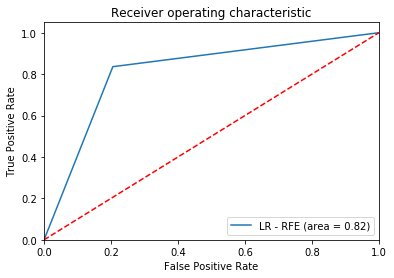

In [65]:
logit_roc_auc = metrics.roc_auc_score(y_test_reg, y_pred_rfe_lr)
#fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = metrics.roc_curve(y_test_reg, y_pred_rfe_lr)
plt.figure()
plt.plot(fpr, tpr, label='LR - RFE (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

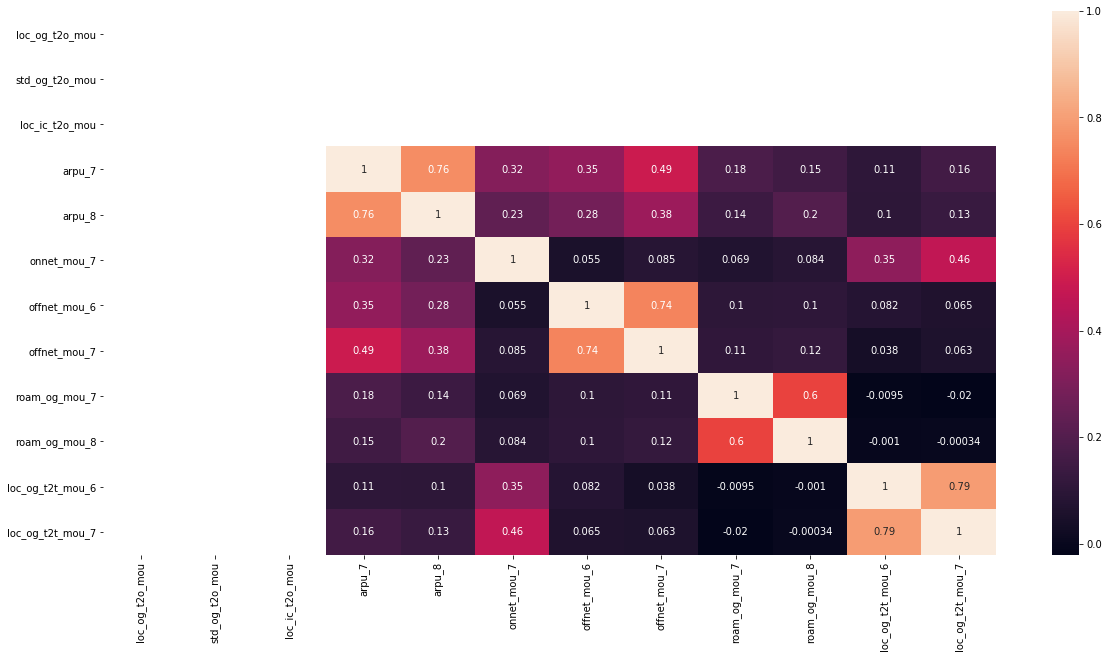

In [66]:
corr = telecom_data_analysis_rfe.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)
plt.show()

In [67]:
telecom_data_analysis_rfe_final = telecom_data_analysis_rfe.drop(['arpu_7','onnet_mou_7','offnet_mou_6','offnet_mou_7'],axis=1)

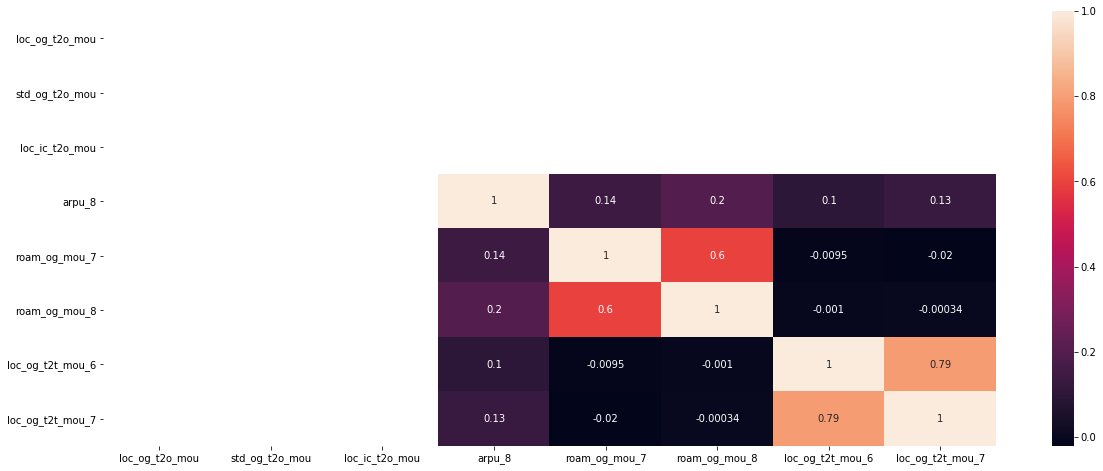

In [68]:
corr = telecom_data_analysis_rfe_final.corr()
plt.figure(figsize=(20,8))
sns.heatmap(corr,annot=True)
plt.show()

In [69]:
lr_rfe_final = LogisticRegression(class_weight='balanced')
scaler_final = StandardScaler()
X_final = telecom_data_analysis_rfe_final
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_final,y_reg,train_size=0.7,test_size=0.3,random_state=100)
X_train_final = std1.fit_transform(X_train_final)
X_test_final = std1.transform(X_test_final)
lr_rfe_final.fit(X_train_final,y_train_reg)
y_pred_rfe_lr = lr_rfe_final.predict(X_test_final)

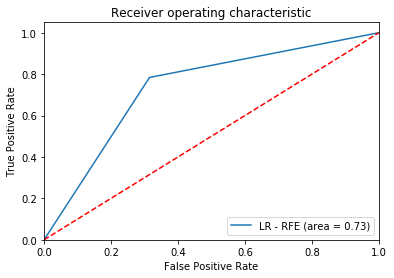

In [70]:
logit_roc_auc = metrics.roc_auc_score(y_test_reg, y_pred_rfe_lr)
#fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = metrics.roc_curve(y_test_reg, y_pred_rfe_lr)
plt.figure()
plt.plot(fpr, tpr, label='LR - RFE (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [71]:
dtree = DecisionTreeClassifier(class_weight='balanced')


In [72]:
params = [{'max_depth':range(3,50,1)},
         {'min_samples_split' : range(10,100,2)},
         {'max_features':['auto','sqrt','log2']}]
gs = GridSearchCV(dtree,params,scoring='recall',return_train_score=True)
gs.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': range(3, 50)}, {'min_samples_split': range(10, 100, 2)}, {'max_features': ['auto', 'sqrt', 'log2']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=0)

In [73]:
print(gs.best_score_)
print(gs.best_params_)
print(gs.cv_results_)

0.840946539021489
{'max_depth': 6}
{'mean_fit_time': array([0.34227395, 0.4211959 , 0.50934378, 0.60449076, 0.6863904 ,
       0.84339317, 0.82984312, 0.98475695, 0.95438615, 1.00349585,
       1.0675118 , 1.12743274, 1.19080265, 1.17515278, 1.18415411,
       1.18908358, 1.23050976, 1.20575174, 1.20941909, 1.23023319,
       1.27721763, 1.2731026 , 1.95128679, 1.41557773, 1.27056956,
       1.29345481, 2.04719861, 1.6786708 , 1.682875  , 1.52164491,
       1.70202009, 1.51822591, 1.5477798 , 1.55341633, 1.62413867,
       1.54390971, 1.48119934, 1.55408732, 1.51338816, 1.55625232,
       1.61495908, 1.74304883, 1.57393424, 1.58953969, 1.57726781,
       1.5425748 , 1.53424223, 1.57560651, 1.52006714, 1.58511225,
       1.54658786, 1.51089422, 1.52690562, 1.61263021, 1.51039418,
       1.4718674 , 1.49104635, 1.56626582, 1.52006904, 1.46986787,
       1.56760311, 1.4673628 , 1.45985842, 1.45135164, 1.56075883,
       1.49887363, 1.4880379 , 1.53340371, 1.47186041, 1.44534151,
       1.

In [74]:
params = {'min_samples_split' : range(10,100,2)}
gs1 = GridSearchCV(dtree,params,scoring='recall',return_train_score=True)
gs1.fit(X_train,y_train)
print(gs1.best_score_)
print(gs1.best_params_)

0.697839930943593
{'min_samples_split': 98}


In [75]:
params = {'max_features' : ['auto','sqrt','log2']}
gs2 = GridSearchCV(dtree,params,scoring='recall',return_train_score=True)
gs2.fit(X_train,y_train)
print(gs2.best_score_)
print(gs2.best_params_)

0.4358545209991584
{'max_features': 'auto'}


In [76]:
params = {'max_depth' : range(3,50,1)}
gs3 = GridSearchCV(dtree,params,scoring='recall',return_train_score=True)
gs3.fit(X_train,y_train)
print(gs3.best_score_)
print(gs3.best_params_)

0.8403545572909638
{'max_depth': 6}


In [77]:
dtree_final = DecisionTreeClassifier(class_weight='balanced',max_depth=6,min_samples_split=98,max_features='auto')
dtree_final.fit(X_train,y_train)
y_pred = dtree_final.predict(X_test)
print(metrics.recall_score(y_test,y_pred))

0.7866666666666666


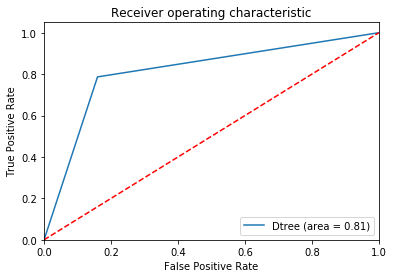

In [78]:
logit_roc_auc = metrics.roc_auc_score(y_test, y_pred)
#fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Dtree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [79]:
dtree_final1 = DecisionTreeClassifier(class_weight='balanced',max_depth=6)
dtree_final1.fit(X_train,y_train)
y_pred = dtree_final1.predict(X_test)
print(metrics.recall_score(y_test,y_pred))
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

0.8453333333333334
0.8553494056215976
[[7065 1186]
 [ 116  634]]


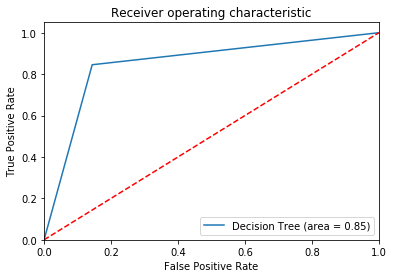

In [80]:
logit_roc_auc = metrics.roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [81]:
features = list(X_train.columns)
os.environ["PATH"] += os.pathsep + 'C:/graphviz/bin/'


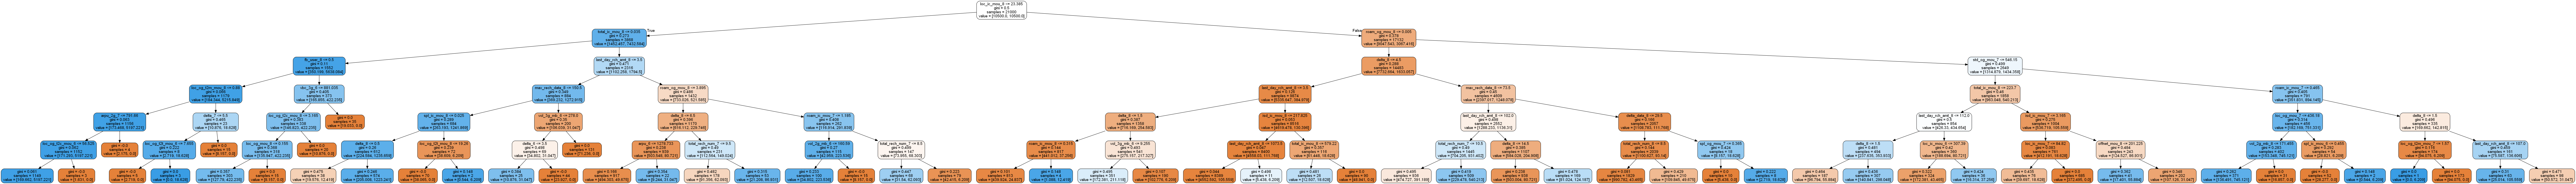

In [82]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dtree_final1, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

0.8453333333333334


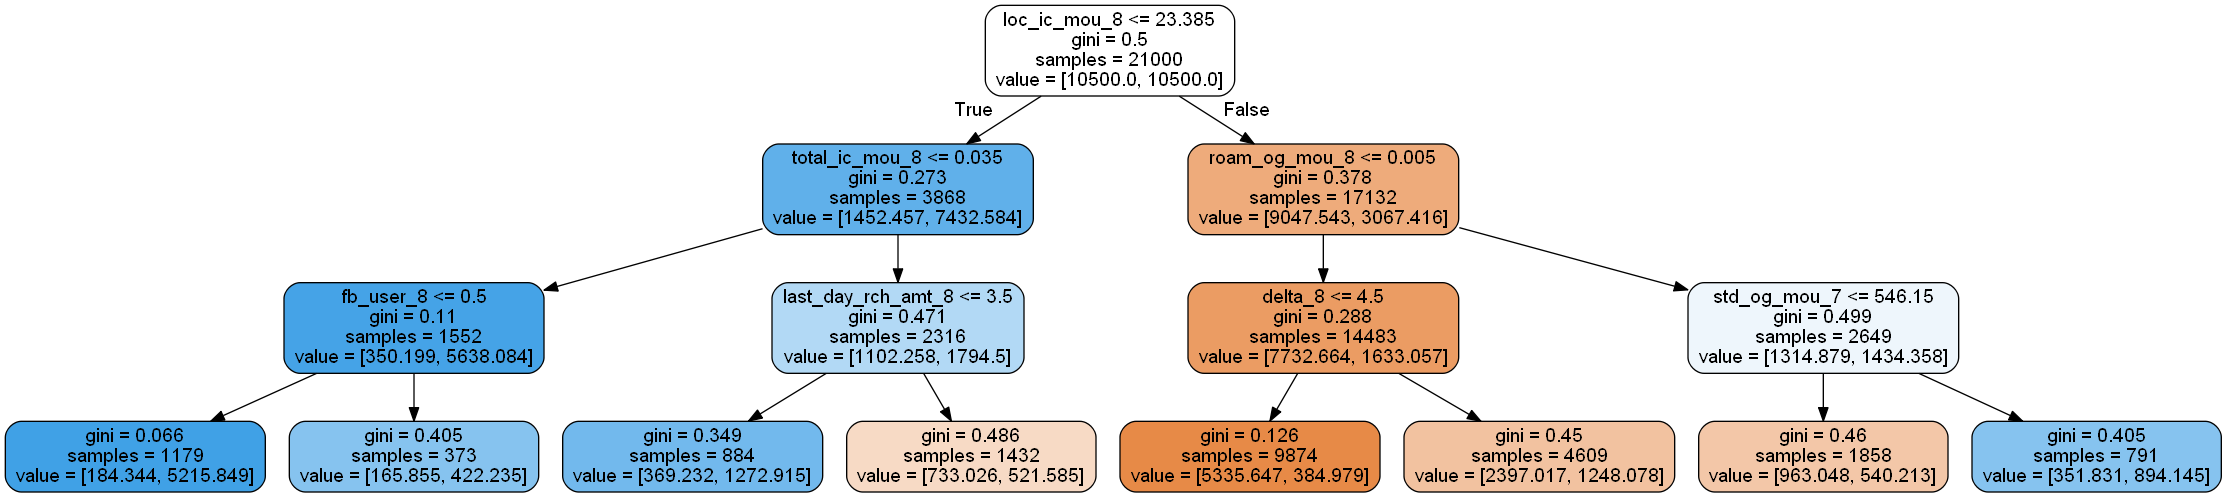

In [83]:
# plotting tree with max_depth=3
dtree_final2 = DecisionTreeClassifier(class_weight='balanced',max_depth=3)
dtree_final2.fit(X_train,y_train)
y_pred = dtree_final1.predict(X_test)
print(metrics.recall_score(y_test,y_pred))

dot_data = StringIO()  
export_graphviz(dtree_final2, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [84]:
dtree_final1.predict(X_test)

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [85]:
rfc = RandomForestClassifier(class_weight='balanced')

params = [{'n_estimators' : range(10,100,5)},
          {'max_depth':range(3,50,1)},
          {'min_samples_split' : range(10,100,2)},
          {'max_features':['auto','sqrt','log2']}]

rfc_gs = GridSearchCV(rfc,params,cv=5,scoring='recall',return_train_score=True)
rfc_gs.fit(X_train,y_train)
print(rfc_gs.best_score_)
print(rfc_gs.best_params_)

0.726789923789243
{'max_depth': 4}


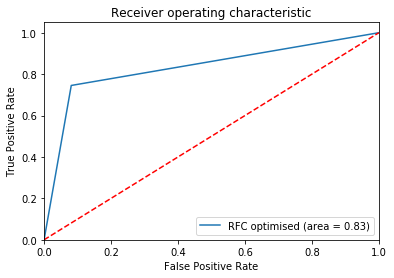

In [94]:
rfc_final = RandomForestClassifier(class_weight='balanced',max_depth=4)

rfc_final.fit(X_train,y_train)
y_pred = rfc_final.predict(X_test)

logit_roc_auc = metrics.roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='RFC optimised (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [95]:
print(metrics.recall_score(y_test,y_pred))
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

0.7453333333333333
0.9043439617820243
[[7581  670]
 [ 191  559]]


In [92]:
# Do Grid Search for XGB tuning parameters & then I am done.
xgb_f_gs = XGBClassifier(class_weight='balanced',n_jobs=10)

params = [{'n_estimators' : range(10,100,20)},
          {'max_depth':range(5,10,1)},
          {'learning_rate':[0.001,0.01,0.1,1,10,100]},
          {'gamma':[0.001,0.01,0.1,0.25]},
          {'subsample':[0.2,0.4,0.5,0.6,0.8,1]},
          {'colsample_bytree':[0.2,0.4,0.5,0.6,0.8,1]},
          {'colsample_bylevel':[0.2,0.4,0.5,0.6,0.8,1]}
          ]

xgb_gs = GridSearchCV(xgb_f_gs,params,cv=5,scoring='recall',return_train_score=True)
xgb_gs.fit(X_train,y_train)
print(xgb_gs.best_score_)
print(xgb_gs.best_params_)

0.5393271327417004
{'learning_rate': 0.25}


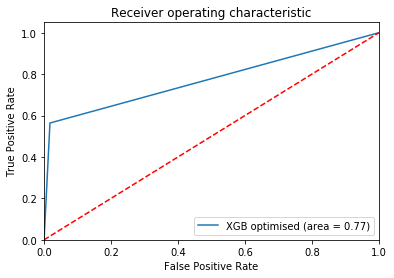

0.564
0.947561382068659
[[8106  145]
 [ 327  423]]


In [96]:
xgb_final = XGBClassifier(class_weight='balanced',learning_rate=0.25)

xgb_final.fit(X_train,y_train)
y_pred = xgb_final.predict(X_test)

logit_roc_auc = metrics.roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='XGB optimised (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

print(metrics.recall_score(y_test,y_pred))
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

# Summary of ROC_AUC_Area

### LR - 0.78 (PCA - data)
### XGB = 0.75 (Default - standarised data)
### RFC = 0.70 (Default - standarised data)
### LR - RFE = 0.73 (RFE with < 10 features - standarised data)
### DT - GS = 0.85 (Default - standarised data) -- best because sensitivity is also maximum
### RFC - GS = 0.83 (Default - standarised data)
### XGB - GS = 0.77 (Default - standarised data)